K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:


*   Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.


*   Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

*   Non -Parametric: In KNN, there is no predefined form of the mapping function.


*   KNN is also called lazy algorithm cuz it uses only similarity by distance calculation for classification and regression.(Euclidean/Manhattan)







In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Problem Statement**

Implement a KNN model to classify the animals into categories



# **Step 1: Importing data**


In [270]:
df = pd.read_csv('/content/Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammals
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammals
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammals


**Note:**



*   Here 1=> Yes, 0=> No
*   Column class_type is an extra column added to the dataset manually to depict the name of the type. This is used only for the analysis purpose. This will be dropped during model building.




# **Step 2: EDA**



In [271]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
 18  class_type   101 non-null    object
dtypes: int64(17), object(2)
memor

In [273]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
class_type     0
dtype: int64

In [274]:
df = df.rename(columns = {'animal name':'animal_name'})


**2.2 Checking relationship between features**


In [275]:
np.round(df.corr(),2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.00,-0.43,-0.82,0.88,-0.20,-0.47,-0.15,0.49,0.19,0.44,-0.10,-0.28,0.39,0.05,0.21,0.46,-0.56
feathers,-0.43,1.00,0.42,-0.41,0.66,-0.06,-0.10,-0.61,0.23,0.25,-0.15,-0.22,-0.21,0.29,0.03,-0.14,-0.20
eggs,-0.82,0.42,1.00,-0.94,0.38,0.38,0.01,-0.64,-0.34,-0.38,0.10,0.16,-0.22,-0.22,-0.16,-0.51,0.66
milk,0.88,-0.41,-0.94,1.00,-0.37,-0.36,-0.03,0.63,0.38,0.42,-0.24,-0.16,0.21,0.21,0.16,0.57,-0.72
airborne,-0.20,0.66,0.38,-0.37,1.00,-0.17,-0.30,-0.59,-0.10,0.29,0.01,-0.25,0.04,0.01,0.06,-0.35,0.02
aquatic,-0.47,-0.06,0.38,-0.36,-0.17,1.00,0.38,0.05,0.02,-0.64,0.09,0.60,-0.36,-0.03,-0.22,-0.11,0.33
predator,-0.15,-0.10,0.01,-0.03,-0.30,0.38,1.00,0.13,0.05,-0.26,0.12,0.19,-0.10,0.02,-0.31,0.14,0.06
toothed,0.49,-0.61,-0.64,0.63,-0.59,0.05,0.13,1.00,0.58,-0.07,-0.06,0.36,-0.19,0.31,0.07,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-0.10,0.02,0.05,0.58,1.00,0.21,-0.25,0.21,-0.43,0.73,0.10,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,0.29,-0.64,-0.26,-0.07,0.21,1.00,-0.12,-0.62,0.37,0.09,0.12,0.20,-0.52


<Axes: >

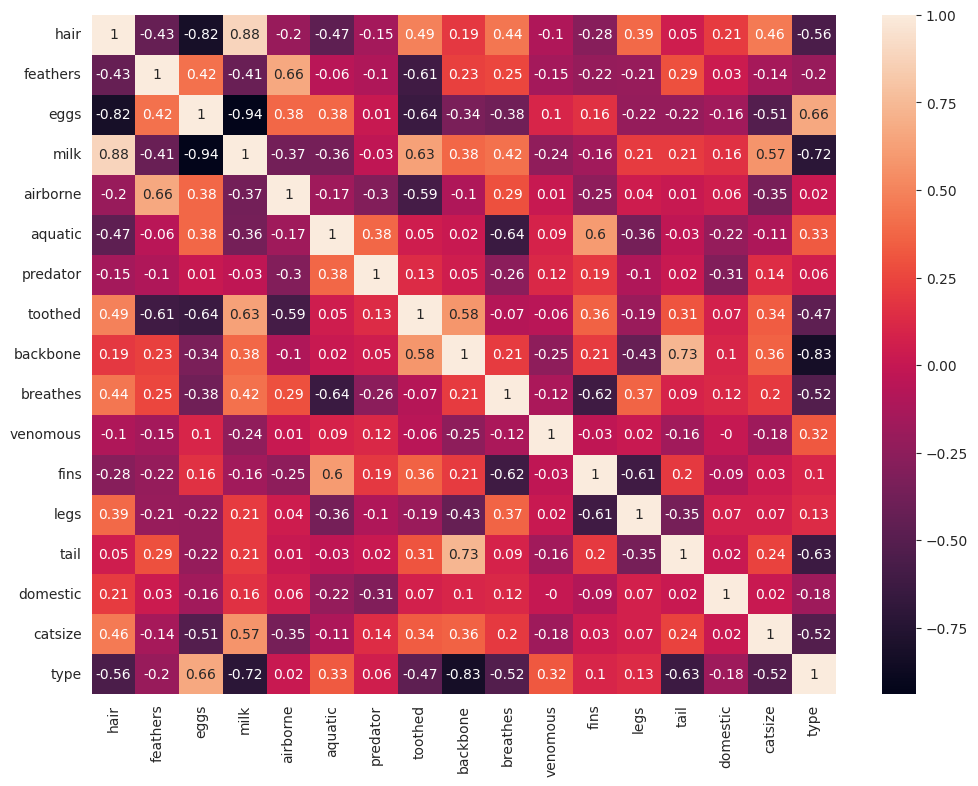

In [276]:
plt.rcParams ['figure.figsize'] = (12,9)
plt.rcParams ['figure.dpi'] = 100

sns.heatmap(np.round(df.corr(),2), annot =True)

**2.3 Visualizing and Analysing data** 

In [277]:
df['class_type'].value_counts()

Mammals          41
Birds            20
Fish             13
Invertebrates    10
Bugs              8
Reptiles          5
Amphibian         4
Name: class_type, dtype: int64

<Axes: xlabel='class_type', ylabel='count'>

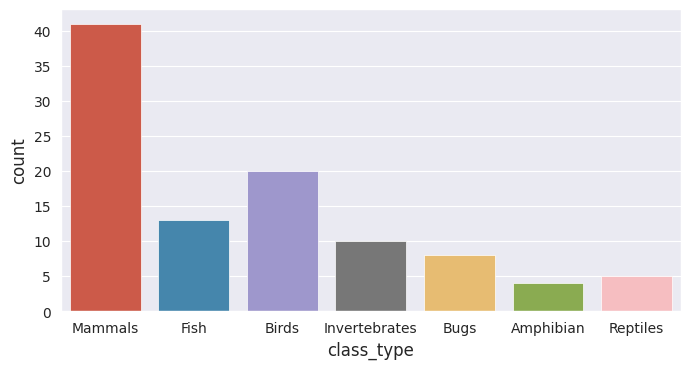

In [278]:
fig= plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')

sns.countplot(x='class_type', data=df)


<Axes: xlabel='class_type', ylabel='count'>

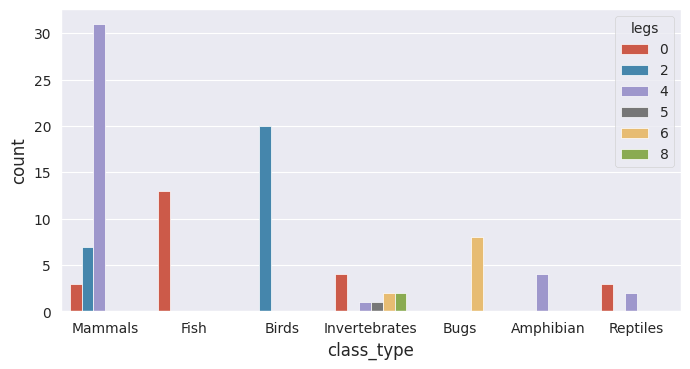

In [279]:
fig= plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')

sns.countplot(x='class_type', data=df, hue ='legs')

<Axes: >

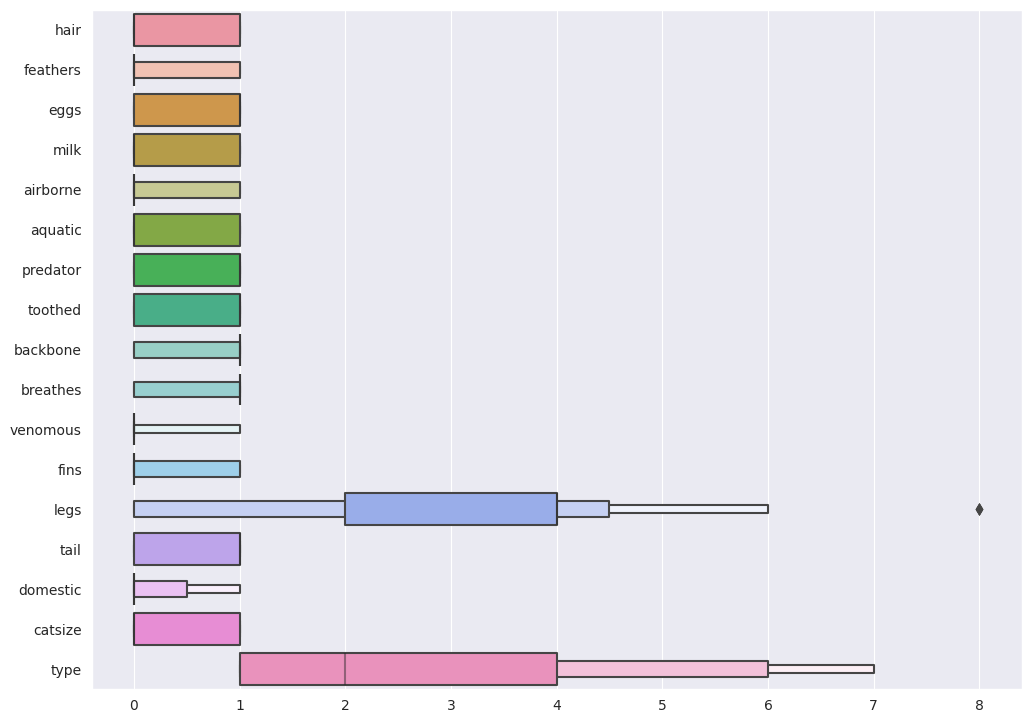

In [280]:
sns.boxenplot(data=df, orient ='h')

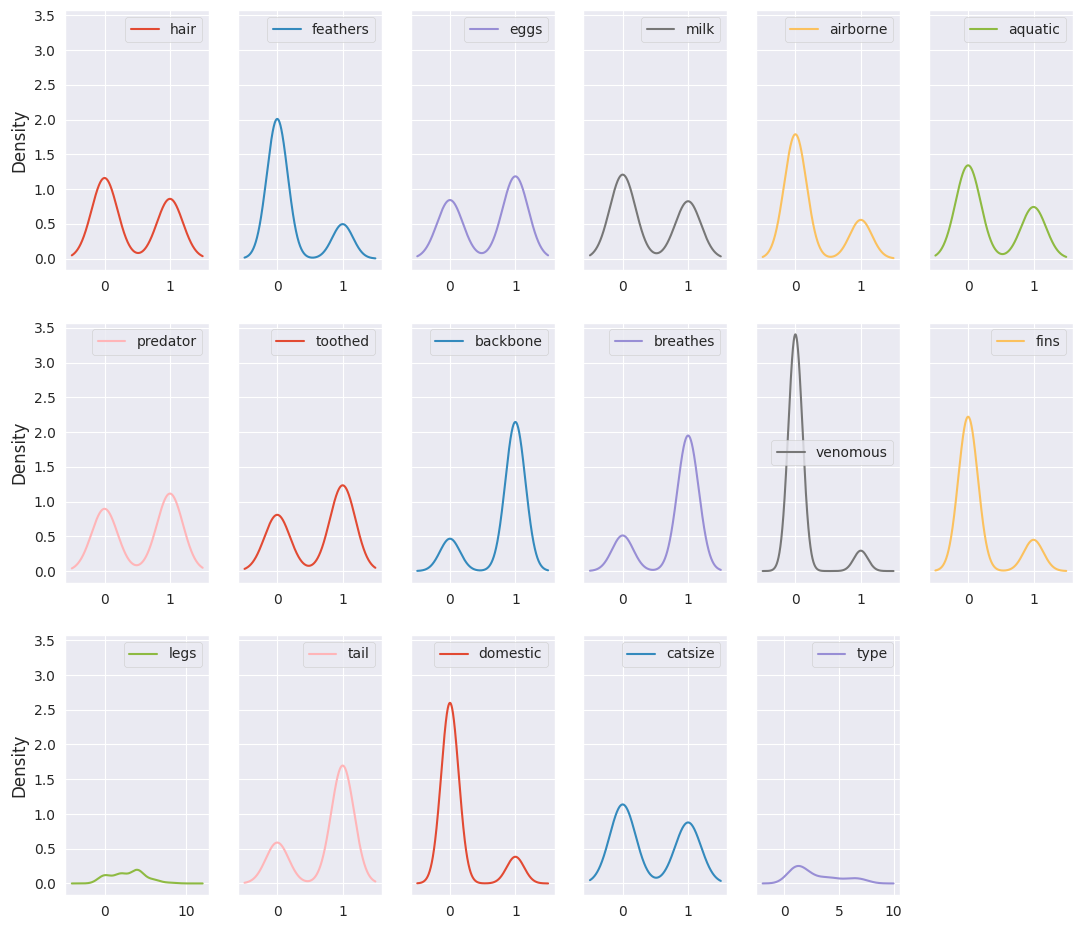

In [281]:
df.plot(kind='density', subplots= True, layout = (5,6), figsize=(13,20), sharex=False, sharey=True)
plt.show()

<Axes: ylabel='animal_name'>

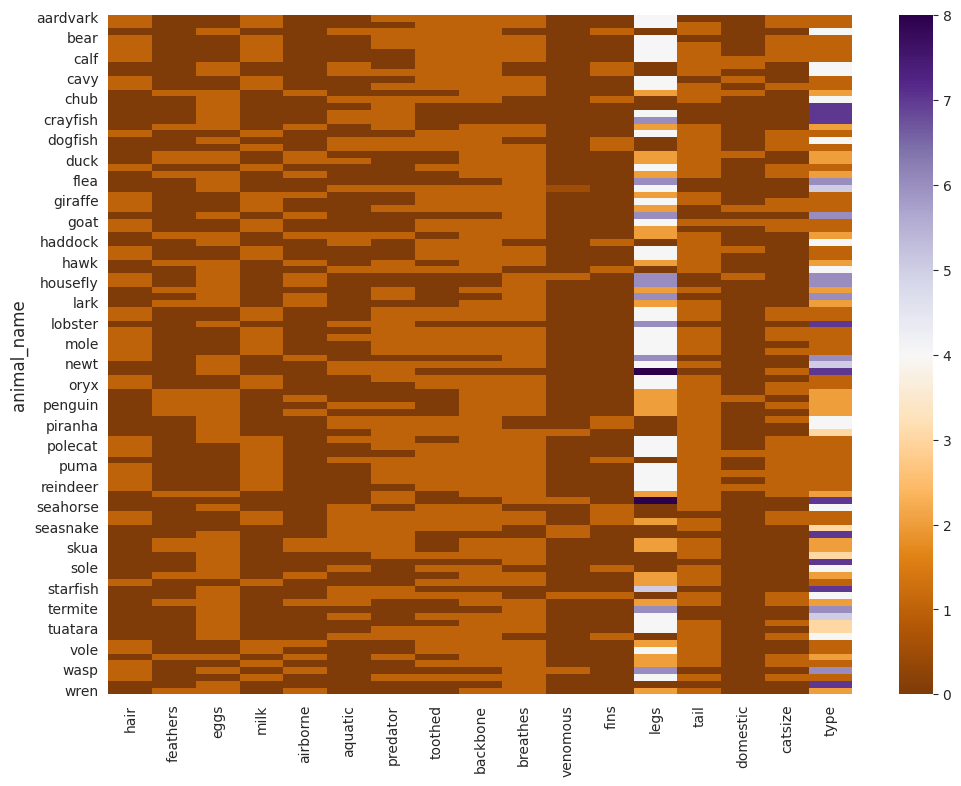

In [282]:
df_mean = df.groupby(by='animal_name').mean()
sns.heatmap(df_mean, cmap="PuOr")


*   We will want to treat the legs columns differently as it does not present data the same way as the remaining columns. So, we will create a column has_legs that checks if an animal has legs (1) or not (0).



In [283]:
df['has_legs'] = np.where(df['legs']>0, 1, 0)             #column has legs = Wherever legs is >0, has legs is 1 else 0
df = df[['animal_name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize','type','class_type']]
df.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1,Mammals


In [284]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'has_legs', 'tail', 'domestic', 'catsize', 'type',
       'class_type'],
      dtype='object')

<Axes: ylabel='animal_name'>

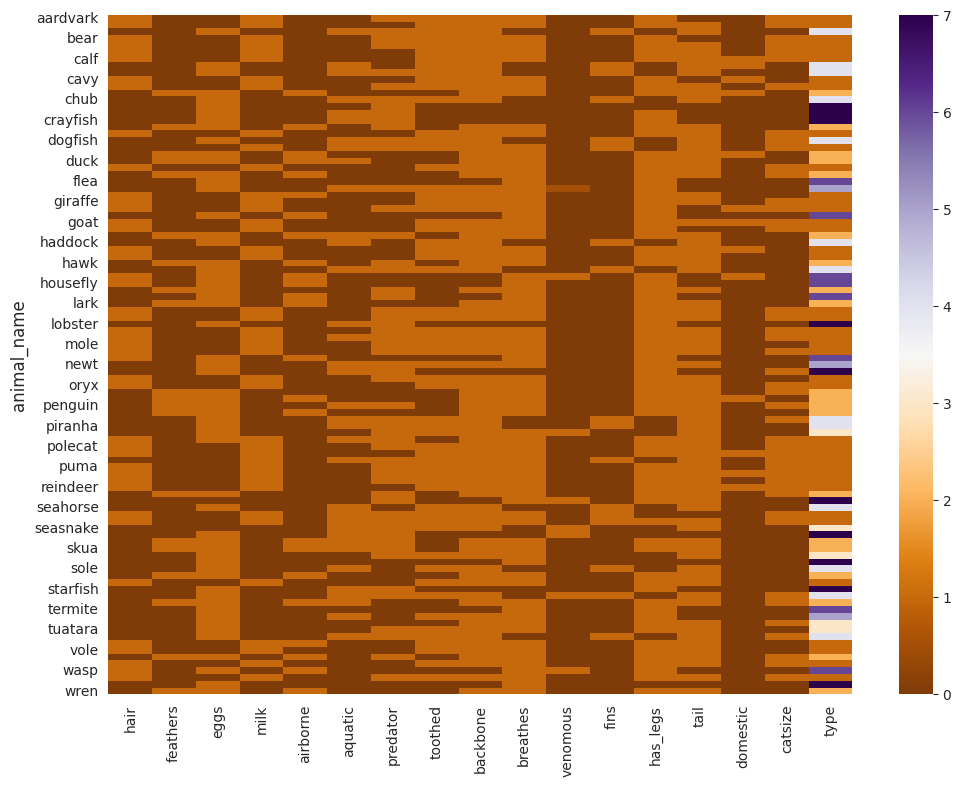

In [285]:
zoo_df = df.copy()
zoo_df = zoo_df.drop(['legs'], axis=1)

zoo_df = zoo_df.groupby(by='animal_name').mean()
sns.heatmap(zoo_df, cmap="PuOr")


As we can see,
  
  Replacing the feature legs with has_legs has made all the independent columns uniform.



Text(0.5, 1.0, 'Histogram of Animal Classes')

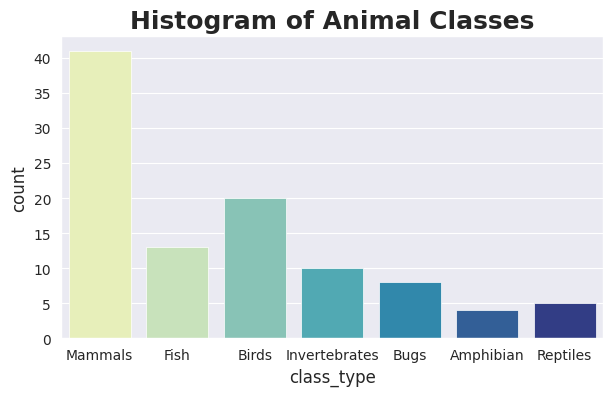

In [286]:
plt.rcParams['figure.figsize'] = (7,4)
sns.set_style('darkgrid')

sns.countplot(x = 'class_type', data =df, palette='YlGnBu')
plt.title('Histogram of Animal Classes', fontsize = 18, fontweight = 'bold')


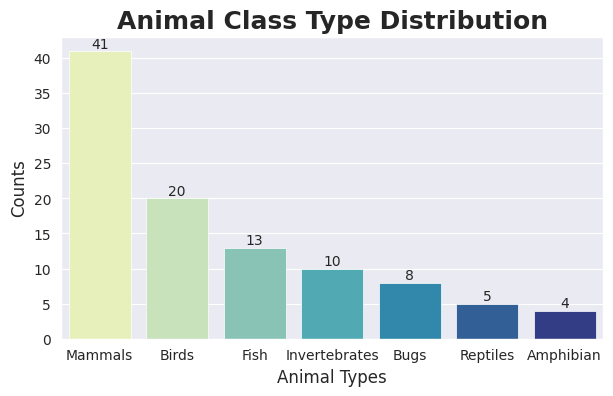

In [287]:
#Sorting the Classes with frequency on the graph

ax = sns.barplot(x = df['class_type'].value_counts().index.tolist(), y = df['class_type'].value_counts(), palette='YlGnBu')

plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')

for i in ax.containers:
  ax.bar_label(i)

In [288]:
df['class_type'].unique()

array(['Mammals', 'Fish', 'Birds', 'Invertebrates', 'Bugs', 'Amphibian',
       'Reptiles'], dtype=object)

In [289]:
df['class_type'].value_counts()

Mammals          41
Birds            20
Fish             13
Invertebrates    10
Bugs              8
Reptiles          5
Amphibian         4
Name: class_type, dtype: int64

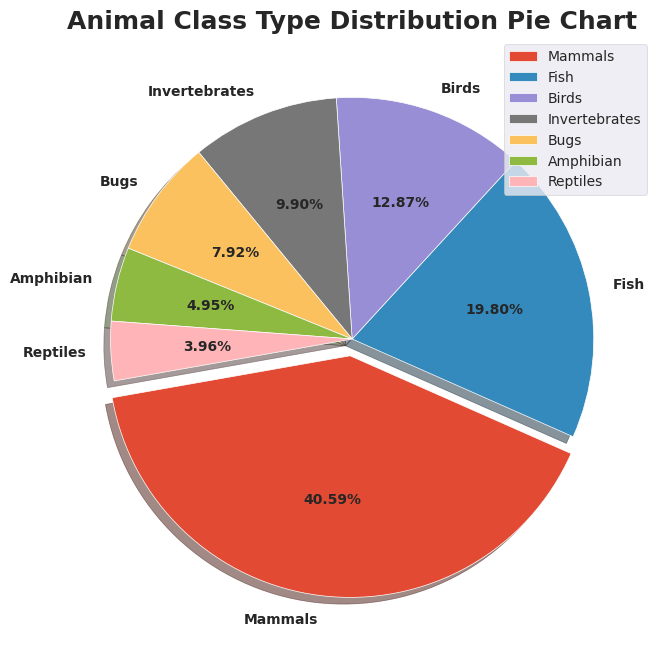

In [290]:
plt.figure(figsize = (10,8))

plt.pie(df['class_type'].value_counts(),
       labels=df.class_type.unique(),
       explode = [0.07,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'fontsize' : 10,
                    'fontweight':'bold'})

plt.legend(loc = 'upper right')
plt.title("Animal Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

<Axes: xlabel='legs', ylabel='count'>

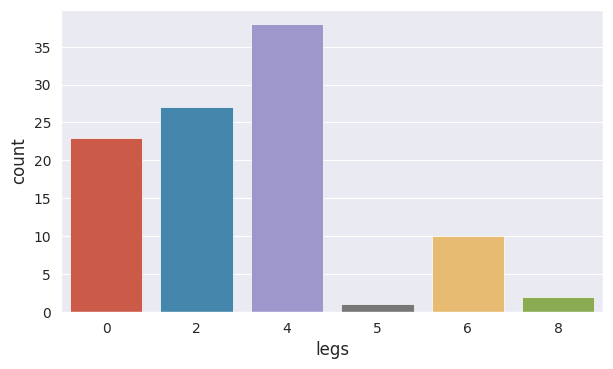

In [291]:
sns.countplot(x ='legs', data =df)




*   Most of the animals have 4 legs
*   Least number of animals have 5 legs & 8 legs



In [292]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'has_legs', 'tail', 'domestic', 'catsize', 'type',
       'class_type'],
      dtype='object')

<Axes: xlabel='catsize', ylabel='count'>

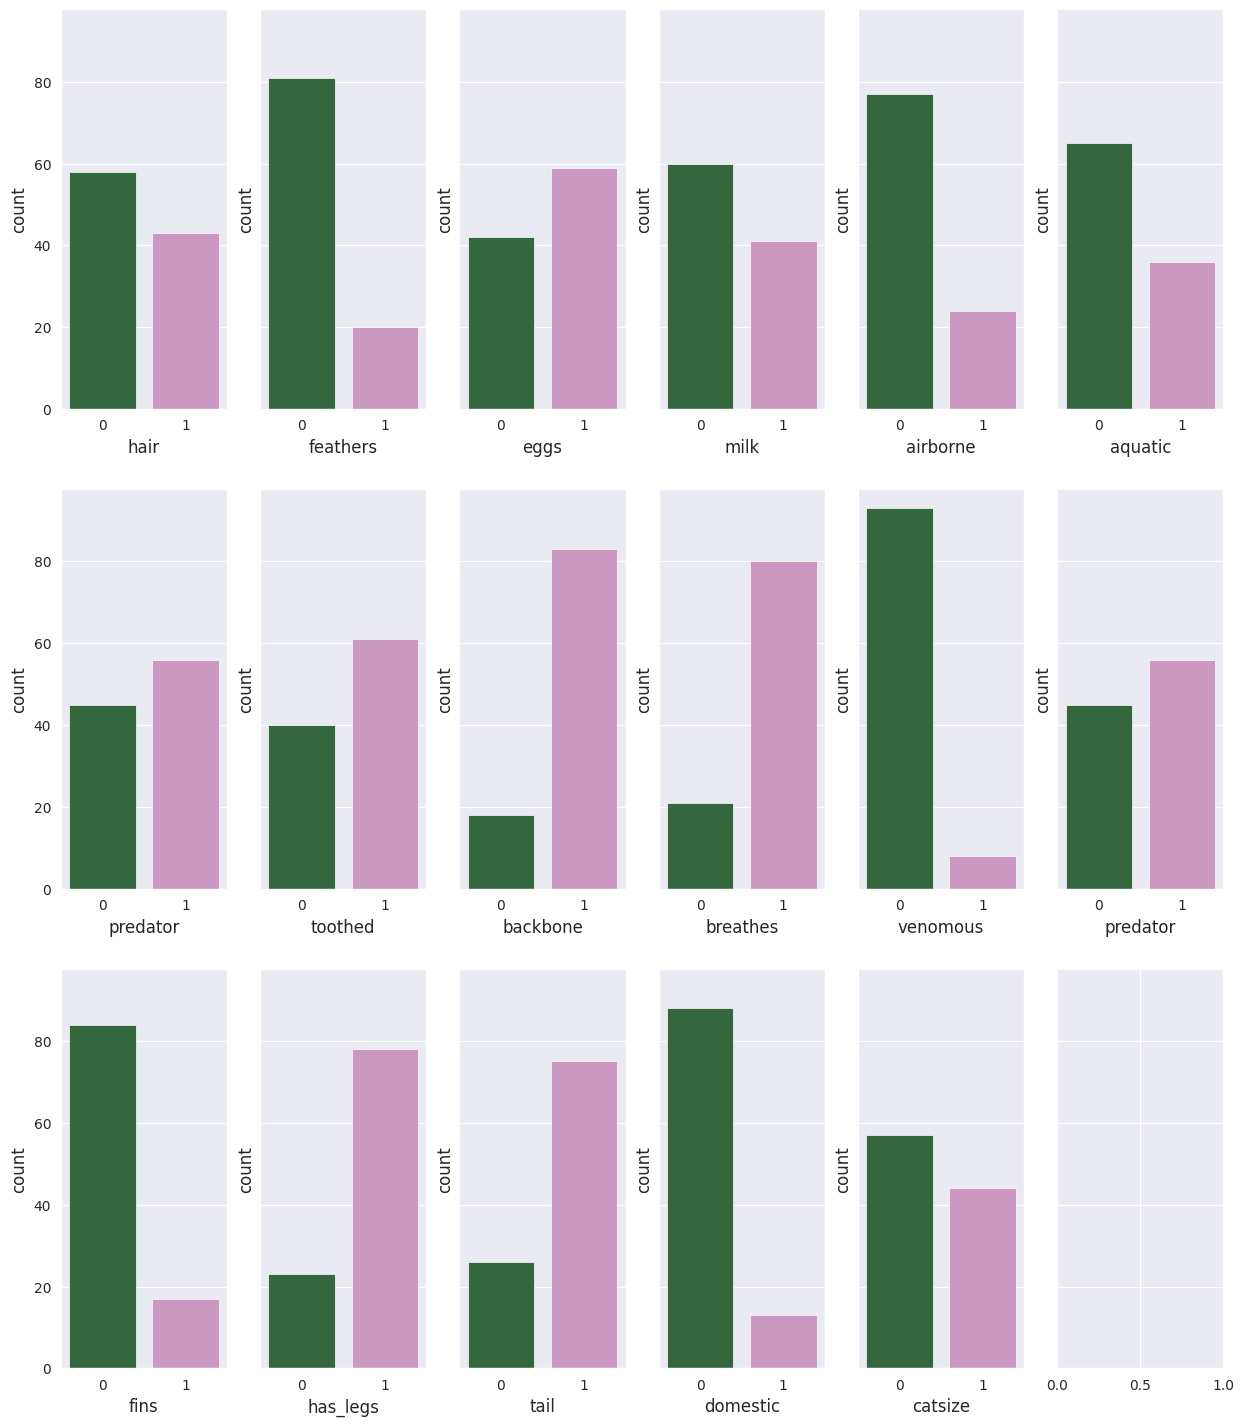

In [293]:
fig, axes = plt.subplots(3,6, figsize=(15,18), sharex=False, sharey=True,)

sns.countplot(x = 'hair', data =df, palette="cubehelix", ax = axes[0,0])
sns.countplot(x = 'feathers', data =df, palette="cubehelix", ax = axes[0,1])
sns.countplot(x = 'eggs', data =df, palette="cubehelix", ax = axes[0,2])
sns.countplot(x = 'milk', data =df, palette="cubehelix", ax = axes[0,3])
sns.countplot(x = 'airborne', data =df, palette="cubehelix", ax = axes[0,4])
sns.countplot(x = 'aquatic', data =df, palette="cubehelix", ax = axes[0,5])
sns.countplot(x = 'predator', data =df, palette="cubehelix", ax = axes[1,0])
sns.countplot(x = 'toothed', data =df, palette="cubehelix", ax = axes[1,1])
sns.countplot(x = 'backbone', data =df, palette="cubehelix", ax = axes[1,2])
sns.countplot(x = 'breathes', data =df, palette="cubehelix", ax = axes[1,3])
sns.countplot(x = 'venomous', data =df, palette="cubehelix", ax = axes[1,4])
sns.countplot(x = 'predator', data =df, palette="cubehelix", ax = axes[1,5])
sns.countplot(x = 'fins', data =df, palette="cubehelix", ax = axes[2,0])
sns.countplot(x = 'has_legs', data =df, palette="cubehelix", ax = axes[2,1])
sns.countplot(x = 'tail', data =df, palette="cubehelix", ax = axes[2,2])
sns.countplot(x = 'domestic', data =df, palette="cubehelix", ax = axes[2,3])
sns.countplot(x = 'catsize', data =df, palette="cubehelix", ax = axes[2,4])


# **Step 3:  Model Building**

**3.1 Feature Scaling**

Note:

*   For any alogrithm that  involves distance calculation, feature scaling is mandatory


*   Never  perform feature scaling on target column






In [294]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [295]:
df.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1,Mammals




*   Type and class_type are same. Since, class_type is making more sense with animal class names whereas type is just numbers, lets remove type and keep class_type

*   Animal name(categorical column) is also not required here for the prediction, so lets drop that as well



In [296]:
zoo_df = df.copy()
zoo_df = zoo_df.drop(['animal_name','type'], axis =1)

In [297]:
zoo_df.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,Mammals
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,Mammals


In [298]:
#splitting independant and dependant features

x = zoo_df.iloc[:,:-1]
y = zoo_df.iloc[:,-1]

In [299]:
x = sc.fit_transform(x)      #perform feature scaling only on independent columns
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

**3.2 Model Building**

In [300]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.2, random_state=1)

In [301]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()                        #seleted k=5 by default

In [302]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)


In [303]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [304]:
confusion_matrix(ytest,ypred)

array([[ 1,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  1,  0,  0,  0]])

In [305]:
print(classification_report(ytest,ypred))

               precision    recall  f1-score   support

    Amphibian       1.00      1.00      1.00         1
        Birds       1.00      1.00      1.00         5
         Bugs       0.00      0.00      0.00         0
         Fish       0.50      1.00      0.67         1
Invertebrates       1.00      0.50      0.67         2
      Mammals       1.00      1.00      1.00        11
     Reptiles       0.00      0.00      0.00         1

     accuracy                           0.90        21
    macro avg       0.64      0.64      0.62        21
 weighted avg       0.93      0.90      0.90        21



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [306]:
 #training accuracy

print(knn.score(xtrain,ytrain))

0.95


In [307]:
#testing accuracy

print(knn.score(xtest,ytest))

0.9047619047619048


**3.3 Selecting best K value**

In [308]:
trainac = []
testac = []

for i in range(1,31):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xtrain,ytrain)
  ypred = knn.predict(xtest)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))

Text(0, 0.5, 'Accuracy')

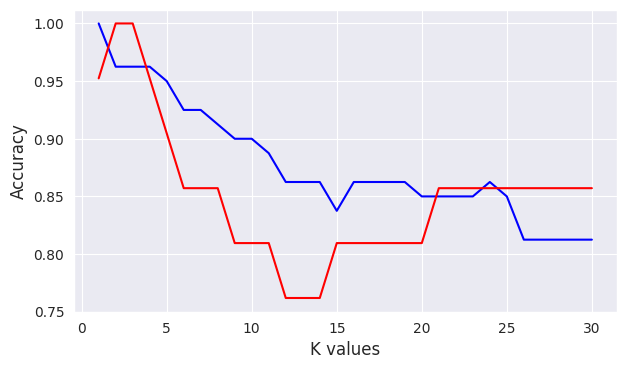

In [309]:
plt.plot(range(1,31), trainac, color = 'b')
plt.plot(range(1,31), testac, color ='r' )

plt.xlabel('K values')
plt.ylabel('Accuracy')

Seems like training accuracy and testing accuracy intersecting when k is 2, 4, 21 or 22 and 24. Lest check the accuracy at these points. It is advisable to take  k value 3 or more.

But the accuracy is decreasing after k = 4

In [310]:
## when k = 4

knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print('Training Accuracy = ', np.round(knn.score(xtrain,ytrain),2))
print('Testing Accuracy = ', np.round(knn.score(xtest,ytest),2))

Training Accuracy =  0.96
Testing Accuracy =  0.95


Training accuracy is 1% higher than testing accuracy. Little underfitting.

In [311]:
## when k = 21

knn = KNeighborsClassifier(n_neighbors= 21)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print('Training Accuracy = ', np.round(knn.score(xtrain,ytrain),2))
print('Testing Accuracy = ', np.round(knn.score(xtest,ytest), 2))

Training Accuracy =  0.85
Testing Accuracy =  0.86


Training accuracy is 1% lesser than testing accuracy. Little overfitting.

In [312]:
## when k = 24

knn = KNeighborsClassifier(n_neighbors= 24)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print('Training Accuracy = ', np.round(knn.score(xtrain,ytrain),2))
print('Testing Accuracy = ', np.round(knn.score(xtest,ytest),2))

Training Accuracy =  0.86
Testing Accuracy =  0.86


Model seems to be more robust when K = 24

As we can see,

For more accuracy, we can select k = 4, but there is 1% underfitting.
For more robust model, we can select k = 24.

In [313]:
print(classification_report(ytest,ypred))

               precision    recall  f1-score   support

    Amphibian       0.00      0.00      0.00         1
        Birds       1.00      1.00      1.00         5
         Bugs       0.00      0.00      0.00         0
         Fish       0.50      1.00      0.67         1
Invertebrates       1.00      0.50      0.67         2
      Mammals       0.92      1.00      0.96        11
     Reptiles       0.00      0.00      0.00         1

     accuracy                           0.86        21
    macro avg       0.49      0.50      0.47        21
 weighted avg       0.84      0.86      0.83        21



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1